<a href="https://colab.research.google.com/github/esraa9322/Active_Learning_ModAL/blob/main/Active_Learning_using_ModAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and installation**

In [ ]:
! pip install modAL 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import modAL
import numpy as np
import matplotlib.pyplot as plt
import keras 
import modAL.uncertainty
import plotly.graph_objects as go

from modAL.models import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from keras.datasets import mnist  
from sklearn import datasets
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from modAL.uncertainty import entropy_sampling 
from modAL.uncertainty import margin_sampling 
from modAL.uncertainty import uncertainty_sampling 
%matplotlib inline 


# **Loading first dataset (Mnist)**

In [ ]:
# loading mnist dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()  

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
initial_idx = np.random.choice(range(len(train_X)), size=15000, replace=False)
X_training, y_training = train_X[initial_idx], train_y[initial_idx]  

In [ ]:
X_training =X_training.reshape((15000, 28*28))
X_training.shape

(15000, 784)

In [ ]:
y_training.reshape((15000,1))
y_training.shape

(15000,)

In [ ]:
first_estimator_mnist=RandomForestClassifier() 

In [ ]:
first_learner_uncertainity = ActiveLearner(
    estimator=first_estimator_mnist,
    query_strategy=uncertainty_sampling,
    X_training=X_training, y_training=y_training
)

In [ ]:
train_X = train_X.reshape((60000,784))

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = first_learner_uncertainity.query(train_X)
    first_learner_uncertainity.teach(train_X[query_idx], train_y[query_idx])

In [ ]:
test_X = test_X.reshape((10000,784))

In [ ]:
score1_mnist_test = first_learner_uncertainity.score(test_X,test_y)
score1_mnist_test*100

95.35

In [ ]:
score1_mnist_train = first_learner_uncertainity.score(train_X,train_y)
score1_mnist_train*100

96.66333333333334

In [ ]:
Second_estimator_mnist = RandomForestClassifier()

In [ ]:
# second strategy
second_learner = ActiveLearner(
    estimator=Second_estimator_mnist,
    query_strategy=margin_sampling,
    X_training=X_training, y_training=y_training
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = second_learner.query(train_X)
    second_learner.teach(train_X[query_idx], train_y[query_idx])

In [ ]:
score2_mnist_train = second_learner.score(train_X,train_y)
score2_mnist_train*100

96.60666666666667

In [ ]:
score2_mnist_test = second_learner.score(test_X,test_y)
score2_mnist_test*100

95.63000000000001

In [ ]:
third_estimator_mnist=RandomForestClassifier()

In [ ]:
# third strategy
third_learner = ActiveLearner(
    estimator=third_estimator_mnist,
    query_strategy=entropy_sampling,
    X_training=X_training, y_training=y_training
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = third_learner.query(train_X)
    third_learner.teach(train_X[query_idx], train_y[query_idx])

In [ ]:
score3_mnist_test = third_learner.score(test_X,test_y)
score3_mnist_test*100

95.7

In [ ]:
score3_mnist_train = third_learner.score(train_X,train_y)
score3_mnist_train*100

96.66166666666666

# **Loading second dataset(Iris dataset)**

In [ ]:
X,y = datasets.load_iris(return_X_y = True) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_train.shape

(100, 4)

In [ ]:
initial_idx2 = np.random.choice(range(len(X_train)), size=5, replace=False)
X_training2, y_training2 = X_train[initial_idx2], y_train[initial_idx2]  

In [ ]:
first_iris_estimator=RandomForestClassifier()

In [ ]:
first_learner_iris = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_training2, y_training=y_training2
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =first_learner_iris.query(X_train)
    first_learner_iris.teach(X_train[query_idx], y_train[query_idx])

In [ ]:
score1_iris_test = first_learner_iris.score(X_test,y_test)
score1_iris_test*100

96.0

In [ ]:
score1_iris_train = first_learner_iris.score(X_train,y_train)
score1_iris_train*100

98.0

In [ ]:
#second strategy
second_learner_iris = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=margin_sampling,
    X_training=X_training2, y_training=y_training2
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =second_learner_iris.query(X_train)
    second_learner_iris.teach(X_train[query_idx], y_train[query_idx])

In [ ]:
score2_iris_test = second_learner_iris.score(X_test,y_test)
score2_iris_test*100

98.0

In [ ]:
score2_iris_train = second_learner_iris.score(X_train,y_train)
score2_iris_train*100

99.0

In [ ]:
third_iris_estimator=RandomForestClassifier()

In [ ]:
#third strategy
third_learner_iris = ActiveLearner(
    estimator=third_iris_estimator,
    query_strategy=entropy_sampling,
    X_training=X_training2, y_training=y_training2
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =third_learner_iris.query(X_train)
    third_learner_iris.teach(X_train[query_idx], y_train[query_idx])

In [ ]:
score3_iris_test = third_learner_iris.score(X_test,y_test)
score3_iris_test*100

96.0

In [ ]:
score3_iris_train = third_learner_iris.score(X_train,y_train)
score3_iris_train*100

98.0

# ***Implementing the previous Strategies on an imabalnced dataset***

In [ ]:
import pandas as pd

In [ ]:
iris=datasets.load_iris() 

# reading same iris dataset into a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df['target'].value_counts())


0    50
1    50
2    50
Name: target, dtype: int64


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


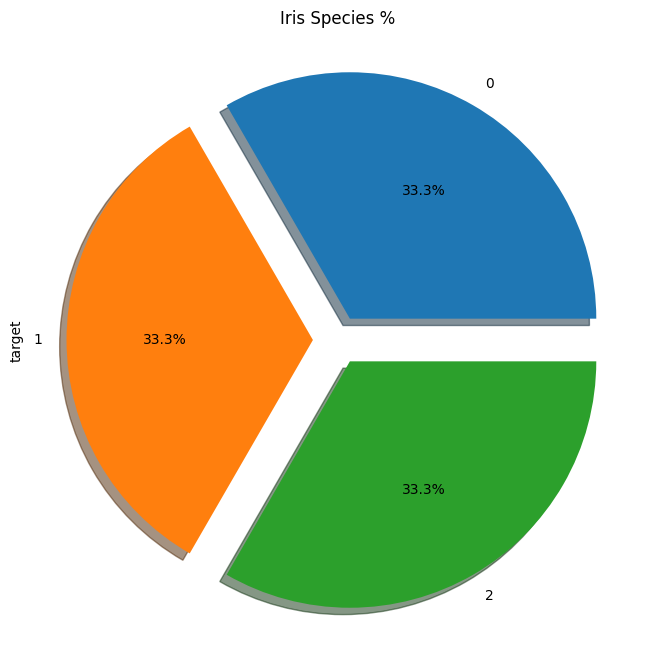

In [ ]:
ax=plt.subplots(1,1,figsize=(10,8))
df['target'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

In [ ]:
# Remove half of the samples with target value 0
#unbalancing data
target_0_indices = df[df['target'] == 0].index
num_samples_to_remove = int(len(target_0_indices) / 2)
samples_to_remove = target_0_indices[:num_samples_to_remove]
df_new = df.drop(samples_to_remove)


print(df['target'].value_counts())

0    50
1    50
2    50
Name: target, dtype: int64


In [ ]:
df_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
25,5.0,3.0,1.6,0.2,0
26,5.0,3.4,1.6,0.4,0
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
29,4.7,3.2,1.6,0.2,0


In [ ]:
x = df_new.loc[:, df.columns != 'target']
y =df_new['target']


In [ ]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
25,5.0,3.0,1.6,0.2
26,5.0,3.4,1.6,0.4
27,5.2,3.5,1.5,0.2
28,5.2,3.4,1.4,0.2
29,4.7,3.2,1.6,0.2


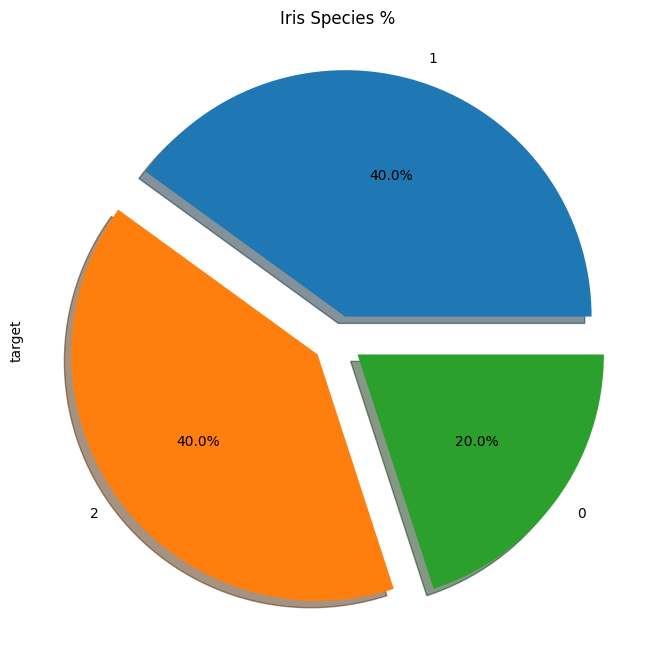

In [ ]:
ax=plt.subplots(1,1,figsize=(10,8))
df_new['target'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x,y,test_size=0.33)

In [ ]:
x_train3 = x_train3.to_numpy()
x_test3 = x_test3.to_numpy() 
y_train3 = y_train3.to_numpy()
y_test3 = y_test3.to_numpy()

In [ ]:
initial_idx3 = np.random.choice(range(len(x_train3)), size=3, replace=False)
X_training3, y_training3 = x_train3[initial_idx3], y_train3[initial_idx3]  

In [ ]:
first_learner_bonus = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_training3, y_training=y_training3
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =first_learner_bonus.query(x_train3)
    first_learner_bonus.teach(x_train3[query_idx], y_train3[query_idx])

In [ ]:
score1_bonus_test = first_learner_bonus.score(x_test3,y_test3)
score1_bonus_test*100

95.23809523809523

In [ ]:
score1_bonus_train = first_learner_bonus.score(x_train3,y_train3)
score1_bonus_train*100

93.97590361445783

In [ ]:
#second strategy
second_learner_bonus = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=margin_sampling,
    X_training=X_training3, y_training=y_training3
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =second_learner_bonus.query(x_train3)
    second_learner_bonus.teach(x_train3[query_idx], y_train3[query_idx])

In [ ]:
score2_bonus_test = second_learner_bonus.score(x_test3,y_test3)
score2_bonus_test*100

71.42857142857143

In [ ]:
score2_bonus_train = second_learner_bonus.score(x_train3,y_train3)
score2_bonus_train*100

75.90361445783132

In [ ]:
#second strategy
third_learner_bonus = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_training3, y_training=y_training3
)

In [ ]:
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =third_learner_bonus.query(x_train3)
    third_learner_bonus.teach(x_train3[query_idx], y_train3[query_idx])

In [ ]:
score3_bonus_test = third_learner_bonus.score(x_test3,y_test3)
score3_bonus_test*100

95.23809523809523

In [ ]:
score3_bonus_train = third_learner_bonus.score(x_train3,y_train3)
score3_bonus_train*100

95.18072289156626

# **Additional test**

In [ ]:
# removing random sampling step before using a specified quering strategy 
#X_train, X_test, y_train, y_test
additional_test_learner = ActiveLearner(estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train )
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance =additional_test_learner.query(X_train)
    additional_test_learner.teach(X_train[query_idx], y_train[query_idx])

In [ ]:
score_additional_test = additional_test_learner.score(X_test,y_test)
score_additional_test*100

94.0

In [ ]:
score_additional_train = additional_test_learner.score(X_train,y_train)
score_additional_train*100

100.0